In [1]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 388.9 kB/s eta 0:01:40
   ---------------------------------------- 0.1/38.6 MB 544.7 kB/s eta 0:01:11
   ---------------------------------------- 0.1/38.6 MB 544.7 kB/s eta 0:01:11
   ---------------------------------------- 0.1/38.6 MB 467.6 kB/s eta 0:01:23
   ---------------------------------------- 0.1/38.6 MB 450.6 kB/s eta 0:01:26
   ---------------------------------------- 0.2/38.6 MB 498.0 kB/s eta 0:01:18
   ---------------------------------------- 0.2/38.6 MB 518.8 kB/s eta 0:01:15
   ---------------------------------------- 0.3/38.6 MB 582.4 kB/s eta 0:01:06
   ---------------------------------------- 0.3/38.6 MB 633.4 kB/s eta 0:01:01
   ---------------------------------------- 0.4/38.6 MB 673.7 kB/s eta 0:00:57
   ---------------------------------------- 0.4/38.6 MB 691.2 kB/s eta

In [34]:
import numpy as np
import cv2
import yaml
from math import *
import matplotlib.pyplot as plt
import os
import glob
chessboardsize = (11,7)

In [35]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

chessboardsize = (11,7)
frame_size = (1026, 578)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((chessboardsize[0] * chessboardsize[1],3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardsize[0],0:chessboardsize[1]].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

## Corners of chessboard Images

In [36]:
import os
os.getcwd()
os.chdir(r'C:\Users\dell\camcal\Re-DistortedImages10')

In [37]:

images = glob.glob('*.jpg')
for image in images:
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, chessboardsize, None)

    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        
        #Draw chess board corners
        cv2.drawChessboardCorners(img, chessboardsize, corners2, ret)

In [38]:
len(imgpoints)

20

In [39]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, 
                                                   gray.shape[::-1], None, None)

In [40]:
mtx, dist

(array([[1.07732109e+03, 0.00000000e+00, 4.98921429e+02],
        [0.00000000e+00, 1.09123673e+03, 3.10299944e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-6.32548368e-01,  7.74989384e+00,  8.93924579e-02,
          2.96349627e-02, -3.15309328e+01]]))

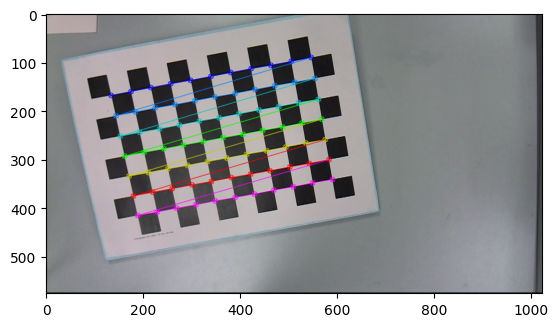

In [270]:
plt.imshow(img)

In [16]:
new_mtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, imageSize = tuple(frame_size), 
                                             alpha = 1, newImgSize=tuple(frame_size))

In [17]:
cx = new_mtx[0][2].astype(np.int32)
cy = new_mtx[1][2].astype(np.int32)
fx = new_mtx[0][0].astype(np.int32)
fy = new_mtx[1][1].astype(np.int32)
new_mtx

array([[5.28453248e+06, 0.00000000e+00, 3.99436542e+02],
       [0.00000000e+00, 5.57921015e+06, 5.99487021e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [45]:
cx = new_mtx[0][2].astype(np.int32)
cy = new_mtx[1][2].astype(np.int32)
fx = new_mtx[0][0].astype(np.int32)
fy = new_mtx[1][1].astype(np.int32)
new_mtx

array([[1.69274900e+05, 0.00000000e+00, 8.02210681e+02],
       [0.00000000e+00, 1.69273994e+05, 7.97547419e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# Removing distortions from all images

In [46]:
for i, image in enumerate(images):
    
    os.chdir(r'C:\Users\dell\camcal\CreatedChessboardImages')
    img = cv2.imread(image)
    
    # undistort
    dst = cv2.undistort(img, mtx, dist, None, new_mtx)
    # crop the image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    os.chdir(r'C:\Users\dell\camcal\DistortedImages2')
    cv2.imwrite(f'undistorted_{i}.jpg', dst)
    

In [49]:
h, w = dst.shape[:2]
h, w

(1599, 1599)

# After creating dataset, Now distort those images using assumed parameters


In [23]:
dist_assumed = dist
os.chdir(r'C:\Users\dell\camcal\customChessboardCalibration\chessboardImages\UndistortedImages')

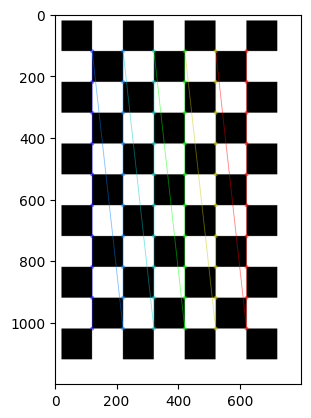

In [24]:
# img = cv2.imread('undistorted_6.jpg')
plt.imshow(img)


In [252]:
cx = mtx[0][2]
cy = mtx[1][2]
fx = mtx[0][0]
fy = mtx[1][1]

In [8]:
def dist_point(x, y):
    k1 = dist_assumed[0][0]
    k2 = dist_assumed[0][1]
    p1 = dist_assumed[0][2]
    p2 = dist_assumed[0][3]
    k3 = dist_assumed[0][4]


    fx = 715.584358525299
    fy = 726.523015404275
    cx = 524.168075757635
    cy = 286.692729805084
    x_norm = x/w
    y_norm = y/h
    cx_norm = cx/w
    cy_norm = cy/h
    r = (((x_norm - cx_norm))**2 + ((y_norm - cy_norm))**2) ** 0.5
    
    M = (k1*(r**2) + k2*(r**4) + k3*(r**6))
    xd = x + (x - cx)*M 
    yd = y + (y - cy)*M 

    xd_norm = xd/w
    yd_norm = yd/h
    rd = (((xd_norm - cx_norm))**2 + ((yd_norm - cy_norm))**2) ** 0.5
    xd = xd + (p1*(r**2 + 2*((xd_norm -cx_norm)**2)) + (2*p2*(xd_norm -cx_norm)*(yd_norm - cy_norm)))
    yd = yd + (p2*(r**2 + 2*((yd_norm -cy_norm)**2)) + (2*p1*(xd_norm -cx_norm)*(yd_norm - cy_norm)))
    
    x, y, xd, yd = int(x), int(y), int(xd), int(yd)
    return xd, yd

In [9]:
def distort_img(img):
    new_img = np.zeros(shape = img.shape, dtype = np.int32)
    new_img = new_img+(256/2)
    for i in range(h):
        for j in range(w):
             
            dist_j, dist_i = dist_point(j, i)
            if (dist_j<0 or dist_i<0) or (dist_j>w-1 or dist_i>h-1):
                #Cannot be mapped
               
                pass
            else:
                
                new_img[dist_i][dist_j] = img[i][j]
    return new_img

In [10]:
int(2.9)

2

In [11]:
dist_assumed

NameError: name 'dist_assumed' is not defined

In [ ]:
dist_point(524,286)

In [12]:
h, w = (578,1026)
h, w

(578, 1026)

In [41]:

dist_assumed = np.array([[0, 0., 0, 0, 0]])

dist_assumed = dist_assumed
dist_assumed

array([[0., 0., 0., 0., 0.]])

In [42]:
os.chdir(r'C:\Users\dell\camcal\UnDistortedImages2')
images = glob.glob('*.jpg')

for i, image in enumerate(images):
    os.chdir(r'C:\Users\dell\camcal\UnDistortedImages2')
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgDist = distort_img(img)
    
    os.chdir(r'C:\Users\dell\camcal\Re-DistortedImages10')
    cv2.imwrite(f'Distorted_Cropped_image_{i}.jpg', imgDist)

    
    
    

KeyboardInterrupt: 

# Using distorted images as dataset for calibration

In [27]:
os.chdir(r'C:\Users\dell\camcal\DistortedImages5')
dist_images = glob.glob('*.jpg')

In [28]:
for image in dist_images:
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, chessboardsize, None)

    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        
        #Draw chess board corners
        cv2.drawChessboardCorners(img, chessboardsize, corners2, ret)
 

In [29]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, 
                                                   gray.shape[::-1], None, None)

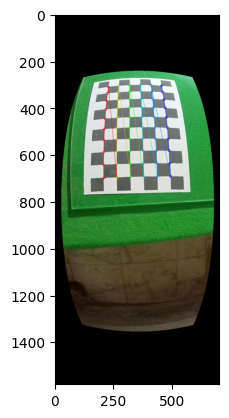

In [30]:
plt.imshow(img)

In [18]:
len(imgpoints)

10

# assumed parameters : [-0.5, -0.2, 0.01, 0.01, -0.1]
## 6/10 images chessboard pattern detected

In [18]:
dist

array([[-0.35499117, -0.73336565,  0.00678376,  0.00868205,  0.64262318]])

# assumed parameters : [0.5, 0, 0.01, 0.01, 0] 
## 9/10 images chessboard pattern detected

In [10]:
dist

array([[-0.39633475, -0.33758743,  0.00643599,  0.00696431,  0.37946834]])

# assumed parameters : [-1, -1, 0.01, 0.01, 3] 
## 8/10 images chessboard pattern detected

In [57]:
dist

array([[-0.89109894, -0.74839368,  0.00571487,  0.00920852,  1.97426674]])

# Parameters used for distortion : [0.25, 0.12, -0.00028, -0.00005, 0.0]

In [10]:
dist

array([[ 0.21204375,  0.05358096,  0.00643803, -0.02090672,  0.10658275]])

# Parameters used for distortion : [-0.9, 0.5, 0.001, -0.002, 0.01]

In [31]:
dist

array([[-0.47968734,  0.42933152, -0.0028883 ,  0.00220081, -0.07118575]])